In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

# Loaded in the data sets

In [5]:
aisles = pd.read_csv('../Unit4/instacart_data/aisles.csv')
departments = pd.read_csv('../Unit4/instacart_data/departments.csv')

orders = pd.read_csv('../Unit4/instacart_data/orders.csv')
products = pd.read_csv('../Unit4/instacart_data/products.csv')

#--
train = pd.read_csv('../Unit4/instacart_data/order_products__train.csv')


In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Exploring the data

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Text(0, 0.5, 'count')

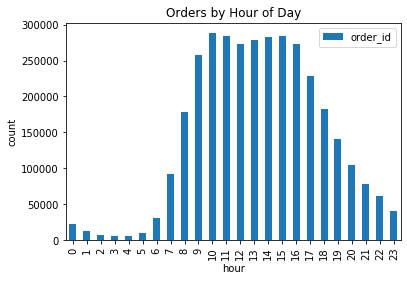

In [9]:
orders_by_hour = orders[['order_id','order_hour_of_day']].groupby('order_hour_of_day').count()

orders_by_hour.plot(kind='bar')

plt.title('Orders by Hour of Day')
plt.xlabel('hour')
plt.ylabel('count')


10AM - 5 PM are peak hours for ordering.

Text(0, 0.5, 'count')

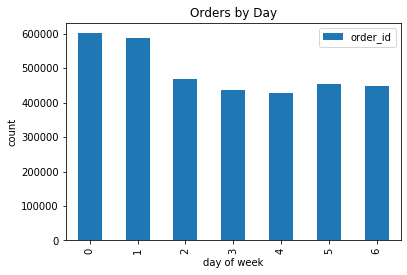

In [10]:
orders_by_day = orders[['order_id','order_dow']].groupby('order_dow').count()

orders_by_day.plot(kind='bar')

plt.title('Orders by Day')
plt.xlabel('day of week')
plt.ylabel('count')


(assuming 0 is Sunday) More people place orders Sunday & Monday

Product & order data sets have no common columns to merge on .. so I am creating a master train set with all data to pull additional stats. Ideally I would use the original entire products & orders data set for this.

In [11]:
train_master = train.merge(orders, on='order_id')
train_master = train_master.merge(products, on='product_id')
train_master = train_master.merge(departments, on='department_id')
train_master = train_master.merge(aisles, on='aisle_id')
train_master.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt


Text(0.5, 1.0, 'Num of Orders by Department')

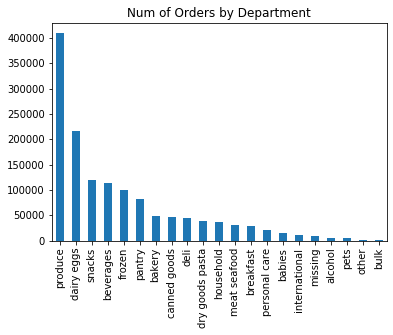

In [12]:
train_master['department'].value_counts().plot(kind='bar')
plt.title('Num of Orders by Department')


Top departments are: produce, dairy eggs, snacks, beverages,frozen,pantry

In [13]:
train_master_hour_department = train_master[(train_master['department'] == 'produce') | (train_master['department'] == 'dairy eggs') | (train_master['department'] == 'snacks') | (train_master['department'] == 'beverages') | (train_master['department'] == 'frozen') | (train_master['department'] == 'pantry')]
train_master_hour_department.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
1,816049,49302,7,1,47901,train,14,4,6,16.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
2,1242203,49302,1,1,2993,train,15,0,7,7.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
3,1383349,49302,11,1,41425,train,4,3,8,14.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt
4,1787378,49302,8,0,187205,train,5,4,14,30.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt


In [14]:
hour_and_top_department = train_master_hour_department[['order_hour_of_day','department']]
hour_and_top_department.head()

,order_hour_of_day,department
0,10,dairy eggs
1,6,dairy eggs
2,7,dairy eggs
3,8,dairy eggs
4,14,dairy eggs


In [15]:
hour_and_top_department['count'] = hour_and_top_department.groupby('order_hour_of_day')['department'].count()
hour_and_top_department.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_hour_of_day,department,count
0,10,dairy eggs,6823.0
1,6,dairy eggs,4235.0
2,7,dairy eggs,2436.0
3,8,dairy eggs,1849.0
4,14,dairy eggs,1763.0


Text(0.5, 1.0, 'Hourly Orders by Department')

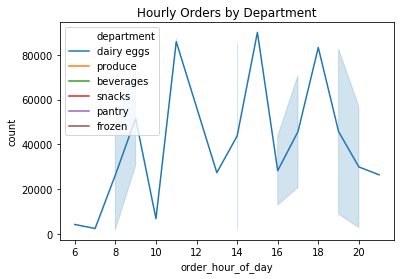

In [65]:
# why is hue not working? -- I looked up seaborn documentation and cannot figure this out..

sns.lineplot(data=hour_and_top_department, x='order_hour_of_day', y='count', hue='department')
plt.title('Hourly Orders by Department')

I'm going to create my own column to add to the data set - basket size.

In [17]:
items_per_order = train_master_hour_department[['order_id','product_id']]

In [18]:
items_per_order = items_per_order.groupby(['order_id']).count().reset_index()

In [19]:
items_per_order.head()

,order_id,product_id
0,1,7
1,36,7
2,38,9
3,96,6
4,98,30


In [20]:
items_per_order.columns = ['order_id','basket_size']

<Figure size 720x1440 with 0 Axes>

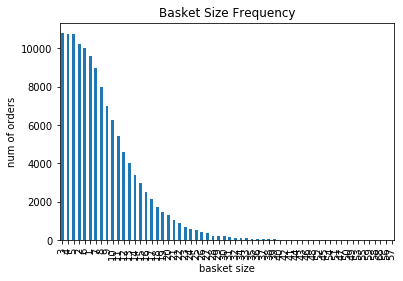

<Figure size 720x1440 with 0 Axes>

In [21]:
items_per_order['basket_size'].value_counts().plot(kind='bar')

plt.title('Basket Size Frequency')
plt.xlabel('basket size')
plt.ylabel('num of orders')

plt.figure(figsize=(10,20))

The most frequent basket size is 3 - 5 items.

In [22]:
# merging basket size into my master train set 
train_master = train_master.merge(items_per_order, on='order_id')
train_master.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle,basket_size
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,yogurt,7
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,7
2,1,22035,8,1,112108,train,4,4,10,9.0,Organic Whole String Cheese,21,16,dairy eggs,packaged cheese,7
3,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce,fresh vegetables,7
4,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce,fresh vegetables,7


# Set up data set

Next step is setting up data for cross validation. Make sure no columns are null, drop unnecessary columns and do one hot encoding.

Making sure theres no missing data 

In [23]:
train_master.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
basket_size               0
dtype: int64

In [24]:
#dropping unecessary columns
train_master.drop('eval_set',axis=1,inplace=True)
train_master.drop('user_id',axis=1,inplace=True)
train_master.drop('product_name',axis=1,inplace=True)
train_master.drop('department_id',axis=1,inplace=True)
train_master.drop('aisle_id',axis=1,inplace=True)

In [25]:
train_master.head()

,order_id,product_id,add_to_cart_order,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle,basket_size
0,1,49302,1,1,4,4,10,9.0,dairy eggs,yogurt,7
1,1,11109,2,1,4,4,10,9.0,dairy eggs,other creams cheeses,7
2,1,22035,8,1,4,4,10,9.0,dairy eggs,packaged cheese,7
3,1,10246,3,0,4,4,10,9.0,produce,fresh vegetables,7
4,1,49683,4,0,4,4,10,9.0,produce,fresh vegetables,7


Set up ordinal & categorical columns

Need to seperate "y" as our result and since data set did not come with a designated test, i'll use 10% of the train set for the test set.

In [26]:
train_master['order_dow'] = train_master['order_dow'].astype(str)

train_master = pd.get_dummies(train_master)
train_master.head()

,order_id,product_id,add_to_cart_order,reordered,order_number,order_hour_of_day,days_since_prior_order,basket_size,order_dow_0,order_dow_1,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,49302,1,1,4,10,9.0,7,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,11109,2,1,4,10,9.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,22035,8,1,4,10,9.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,10246,3,0,4,10,9.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,49683,4,0,4,10,9.0,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# data set is too big and taking forever to run so pulling a random sample to work with.
# I started high and kept reducing sample size until the cells would run.. 75K was
# the most time efficient size. Probably smaller than ideal but it is what it is.
train_master = train_master.sample(n = 75000) 

In [28]:
train = train_master.copy()

No test set given, so using train_test_split to deem 10% of training set as test set 


In [29]:
y = train['reordered']
train.drop('reordered',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=2020)

# Choose algorithm - Random forests, since our result is binary

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [31]:
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [32]:
scores

array([0.64731151, 0.64790401, 0.64360835, 0.63703704, 0.64207407,
       0.64044444, 0.64903704, 0.64587346, 0.64957772, 0.65105942])

In [33]:
np.mean(scores)

0.6453927064698699

My validation score was a 67% (before sampling) now a 65%, so I am going to try and tweak the features included to increase the score.

# Take 2 !

Merging Y back in to my training set and Im going to look at correlation, and keep making new iterations of the data set by strategically keeping columns to see if that raises my score.

In [31]:
train_master.head()

,order_id,product_id,add_to_cart_order,reordered,order_number,order_hour_of_day,days_since_prior_order,basket_size,order_dow_0,order_dow_1,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
441963,1271390,27966,7,1,10,12,7.0,16,0,1,...,0,0,0,0,0,0,0,0,0,0
1278914,2238597,41400,4,1,55,10,2.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
129043,2975737,30391,5,1,12,12,20.0,33,1,0,...,0,0,0,0,0,0,0,0,0,0
751673,3288563,5699,6,1,58,9,15.0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1085198,3283076,29088,3,0,27,17,5.0,9,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
corr = train_master.corr()
corr['reordered_abs'] = abs(corr['reordered'])
corr.sort_values('reordered_abs',ascending=False).head(20)

,order_id,product_id,add_to_cart_order,reordered,order_number,order_hour_of_day,days_since_prior_order,basket_size,order_dow_0,order_dow_1,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,reordered_abs
reordered,0.003798,0.002521,-0.145538,1.000000,0.221017,-0.022613,-0.162808,0.042553,0.005134,0.007904,...,-0.007063,0.006713,-0.006066,0.002119,-0.020697,-0.018726,0.050942,-0.000560,0.039864,1.000000
order_number,-0.000013,-0.005909,0.015165,0.221017,1.000000,-0.026600,-0.403927,0.040847,0.013841,-0.040330,...,0.003598,0.005510,0.005206,0.003003,-0.009112,0.009927,0.004009,-0.001799,0.015392,0.221017
days_since_prior_order,0.003796,0.005502,0.022273,-0.162808,-0.403927,0.005767,1.000000,0.012366,-0.020740,0.045371,...,-0.001831,-0.000684,-0.001196,-0.000049,0.003557,-0.007745,-0.002491,0.001890,-0.007264,0.162808
add_to_cart_order,0.004735,0.007400,1.000000,-0.145538,0.015165,-0.004998,0.022273,0.626897,0.035620,0.000154,...,-0.004158,0.000868,0.015769,0.001731,-0.000236,-0.000759,-0.064738,-0.007984,-0.018856,0.145538
department_pantry,0.000882,-0.001465,0.043730,-0.120751,-0.010356,0.001743,0.004381,0.007929,-0.013077,-0.004252,...,-0.020739,-0.015907,-0.020075,-0.008366,-0.008314,-0.009617,-0.041679,-0.006303,-0.052600,0.120751
aisle_fresh fruits,-0.001232,0.043190,-0.070397,0.099707,0.023889,0.001126,-0.021807,0.010738,0.011617,0.007320,...,-0.028299,-0.021706,-0.027393,-0.011416,-0.011345,-0.013123,-0.056874,-0.008601,-0.071775,0.099707
department_produce,-0.002187,0.068339,-0.032802,0.086770,0.023615,0.002446,-0.015383,0.058068,0.035264,0.002132,...,-0.052752,-0.040461,-0.051062,-0.021280,-0.021148,-0.024462,-0.106016,-0.016033,-0.133793,0.086770
aisle_spices seasonings,-0.002974,0.001904,0.019490,-0.075371,-0.003425,0.002417,0.001732,0.002739,-0.002199,0.001579,...,-0.006948,-0.005329,-0.006725,-0.002803,-0.002785,-0.003222,-0.013963,-0.002112,-0.017622,0.075371
department_dairy eggs,-0.003863,-0.009347,-0.057465,0.069476,0.012015,-0.004772,-0.006064,0.011222,0.000374,0.009071,...,-0.035273,-0.027055,-0.034144,-0.014229,-0.014141,-0.016357,-0.070890,-0.010721,0.477718,0.069476
department_personal care,0.000722,-0.008772,0.011434,-0.063452,-0.014567,0.003548,0.013824,-0.045838,-0.007526,0.001101,...,-0.010180,-0.007808,-0.009854,-0.004107,-0.004081,0.302632,-0.020460,-0.003094,-0.025821,0.063452


In [34]:
# testing my score out columns with the most correlation with reordering
train_master = train_master[['reordered','order_number', 'days_since_prior_order', 'add_to_cart_order', 'department_pantry','aisle_fresh fruits', 'department_produce','aisle_spices seasonings' ,'department_dairy eggs', 'department_personal care','aisle_milk','aisle_baking ingredients', 'department_household','aisle_water seltzer sparkling water', 'department_canned goods','aisle_condiments', 'department_canned goods','department_international','aisle_oils vinegars', 'basket_size', 'department_dry goods pasta']]
train_master.head()

,reordered,order_number,days_since_prior_order,add_to_cart_order,department_pantry,aisle_fresh fruits,department_produce,aisle_spices seasonings,department_dairy eggs,department_personal care,...,aisle_baking ingredients,department_household,aisle_water seltzer sparkling water,department_canned goods,aisle_condiments,department_canned goods,department_international,aisle_oils vinegars,basket_size,department_dry goods pasta
944857,0,14,30.0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,14,0
429769,1,5,30.0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,14,0
787394,1,13,15.0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,0
505378,0,9,30.0,12,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,9,0
1340651,0,6,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0


In [35]:
train = train_master.copy()

In [36]:
y = train['reordered']
train.drop('reordered',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=2020)

In [37]:
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [38]:
np.mean(scores)

0.6338817757296412

In [39]:
#validation score went down!
# trying narrowing down to less columns

In [40]:
train_master = train_master[['reordered','order_number', 'days_since_prior_order', 'add_to_cart_order', 'department_pantry','aisle_fresh fruits']]
train = train_master.copy()

In [41]:
train.head()

,reordered,order_number,days_since_prior_order,add_to_cart_order,department_pantry,aisle_fresh fruits
944857,0,14,30.0,8,0,0
429769,1,5,30.0,4,0,0
787394,1,13,15.0,9,0,0
505378,0,9,30.0,12,0,1
1340651,0,6,3.0,3,0,0


In [42]:
y = train['reordered']
train.drop('reordered',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=2020)

In [43]:
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [44]:
np.mean(scores)
#validation score when down!
# trying narrowing down to less columns

0.6171560316755071

In [48]:
train_master = train_master[['reordered','order_number', 'days_since_prior_order', 'add_to_cart_order', 'department_pantry']]
train = train_master.copy()

In [49]:
y = train['reordered']
train.drop('reordered',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=2020)

In [50]:
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [51]:
np.mean(scores)
#validation score keeps decreasing.

0.6171707060349817

In [52]:
train_master = train_master[['reordered','order_number', 'days_since_prior_order', 'add_to_cart_order']]
train = train_master.copy()

In [53]:
y = train['reordered']
train.drop('reordered',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=2020)

In [54]:
scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

In [55]:
np.mean(scores)
# score keeps going down as i remove columns. Going to move ahead with the first
# iteration, using all columns

0.6078967393328351

Removing columns is not increasing my score, so I am doing to revert back to my first method and include all columns.

In [34]:
train = pd.read_csv('../Unit4/instacart_data/order_products__train.csv')

train = train.merge(orders, on='order_id')
train = train.merge(products, on='product_id')
train = train.merge(departments, on='department_id')
train = train.merge(aisles, on='aisle_id')
train = train.merge(items_per_order, on='order_id')
# I did a test and the basket size column did increase my score!

In [35]:
#dropping unecessary columns
train.drop('eval_set',axis=1,inplace=True)
train.drop('user_id',axis=1,inplace=True)
train.drop('product_name',axis=1,inplace=True)
train.drop('department_id',axis=1,inplace=True)
train.drop('aisle_id',axis=1,inplace=True)

In [36]:
train['order_dow'] = train['order_dow'].astype(str)


In [37]:
train = pd.get_dummies(train)

In [38]:
# need to cut down my sample even further because grid search wont run with 75K samples..
train = train.sample(n = 30000)
y = train['reordered']
train.drop('reordered',axis=1,inplace=True)

In [39]:

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=2020)


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [41]:
rf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
rf.predict(X_train)

array([0, 1, 0, ..., 1, 0, 0])

In [43]:
rf.score(X_test,y_test) # score slightly dropped with less samples, but need to roll with it or else grid search wont run.

0.6506666666666666

# Making a the pipeline

In [44]:
# We talked about doing pipeline after grid search, however pipe is an input into the grid search so doing pipe first


from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder


# initialize everything
rf = RandomForestClassifier()
ohe = OneHotEncoder()

# make the pipe
pipe = make_pipeline(ohe, rf)

In [45]:
from sklearn.metrics import mean_squared_error, make_scorer

loss_function = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [46]:
loss_function

make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [47]:
from sklearn.model_selection import GridSearchCV

params = {
    'randomforestclassifier__min_samples_leaf': [1, 5, 10, 25],
    'randomforestclassifier__max_features': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'randomforestclassifier__n_estimators': [10, 50, 100]
}

grid = GridSearchCV(estimator=pipe, param_grid=params, cv=5)

In [48]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('onehotencoder',
                                        OneHotEncoder(cols=None,
                                                      drop_invariant=False,
                                                      handle_missing='value',
                                                      handle_unknown='value',
                                                      return_df=True,
                                                      use_cat_names=False,
                                                      verbose=0)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                             

In [50]:
grid.best_params_

{'randomforestclassifier__max_features': 0.3,
 'randomforestclassifier__min_samples_leaf': 25,
 'randomforestclassifier__n_estimators': 100}

In [51]:
pipe.steps[1][1]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
pipe.steps[1][1].set_params(n_estimators=100, min_samples_leaf=25, max_features=0.3)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=0.3, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=25,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                         

In [54]:
pipe.score(X_test,y_test)

0.6856666666666666

Adjusting the parameters made my score go up ~4pp. Before needing to narrow down
my sample set to get this to run, my score was a 67% (dropped to 65% when I narrowed down the data set. Since this is directionally positive, I am going to assume that my scores would go up with the full data set as well. If I applied ~4pp increase to the original 67% score, my score would be 71%.

In [59]:
import pickle
# creating a pickle file to dump my pipeline into
with open('reordered_pipe.pickle', 'wb') as f:
    pickle.dump(pipe, f)
# to load the pipeline back into memory
with open('reordered_pipe.pickle', 'rb') as f:
    # loaded_pipeline will be the same thing as reordered_pipe
    loaded_pipeline = pickle.load(f)
